In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Admission_Predict.csv")

df = df.drop("Serial No.", axis=1)


df = df.sample(frac=1, random_state=42) 
train_size = int(0.6 * len(df)) # use 60% of the data for training
train_df = df[:train_size]
test_df = df[train_size:]

In [6]:
X_train = train_df.drop("Chance of Admit ", axis=1).values 
y_train = train_df["Chance of Admit "].values.reshape(-1, 1) 
X_test = test_df.drop("Chance of Admit ", axis=1).values
y_test = test_df["Chance of Admit "].values.reshape(-1, 1)

In [7]:
# Normalize the features using min-max scaling
X_min = X_train.min(axis=0) 
X_max = X_train.max(axis=0) 
X_train_norm = (X_train - X_min) / (X_max - X_min) 
X_test_norm = (X_test - X_min) / (X_max - X_min)
# print(X_train_norm)

In [8]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient(X, y_true, y_pred, w, b):
    N = len(X)
    dw = -2 / N * np.dot(X.T, (y_true - y_pred))
    db = -2 / N * np.sum(y_true - y_pred)
    return dw, db

def gradient_descent_update(X, y, w, b, alpha):
    y_pred = np.dot(X, w) + b
    dw, db = gradient(X, y, y_pred, w, b)
    w = w - alpha * dw
    b = b - alpha * db
    return w, b

In [9]:
def train_linear_regression(X, y, variant="batch", epochs=1000, alpha=0.1):
    n_features = X.shape[1]
    w = np.random.randn(n_features, 1)
    b = np.random.randn()
    losses = []
    if variant == "batch":
        batch_size = len(X)
    elif variant == "mini-batch":
        batch_size = 10 
    elif variant == "stochastic":
        batch_size = 1 
    else:
        print("Invalid variant name. Please choose from 'batch', 'mini-batch', or 'stochastic'.")
        return None, None, None
    
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            w, b = gradient_descent_update(X_batch, y_batch, w, b, alpha)
            y_pred = np.dot(X_batch, w) + b
            batch_loss = mse(y_batch, y_pred)
            epoch_loss += batch_loss * len(X_batch)
        
        epoch_loss /= len(X)
        losses.append(epoch_loss)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss}")
    
    return w, b, losses

In [10]:
w_batch, b_batch, losses_batch = train_linear_regression(X_train_norm, y_train, variant="batch")
w_mini, b_mini, losses_mini = train_linear_regression(X_train_norm, y_train, variant="mini-batch")
w_sto, b_sto, losses_sto = train_linear_regression(X_train_norm, y_train, variant="stochastic")

Epoch 1, Loss: 1.5444685820579218
Epoch 2, Loss: 0.5642278446061106
Epoch 3, Loss: 0.4403243279082988
Epoch 4, Loss: 0.4176703897883821
Epoch 5, Loss: 0.4071750878327552
Epoch 6, Loss: 0.39832117408440265
Epoch 7, Loss: 0.3898616488430331
Epoch 8, Loss: 0.3816434168714223
Epoch 9, Loss: 0.37364264369020905
Epoch 10, Loss: 0.365850939748265
Epoch 11, Loss: 0.35826192463903256
Epoch 12, Loss: 0.3508696344336679
Epoch 13, Loss: 0.3436683266293475
Epoch 14, Loss: 0.33665245034238317
Epoch 15, Loss: 0.3298166363311503
Epoch 16, Loss: 0.323155689672933
Epoch 17, Loss: 0.31666458304962847
Epoch 18, Loss: 0.31033845038363306
Epoch 19, Loss: 0.3041725807771481
Epoch 20, Loss: 0.2981624127342304
Epoch 21, Loss: 0.29230352864899456
Epoch 22, Loss: 0.28659164954479127
Epoch 23, Loss: 0.2810226300502188
Epoch 24, Loss: 0.27559245359875434
Epoch 25, Loss: 0.2702972278396518
Epoch 26, Loss: 0.2651331802485484
Epoch 27, Loss: 0.2600966539269661
Epoch 28, Loss: 0.25518410358058435
Epoch 29, Loss: 0.250

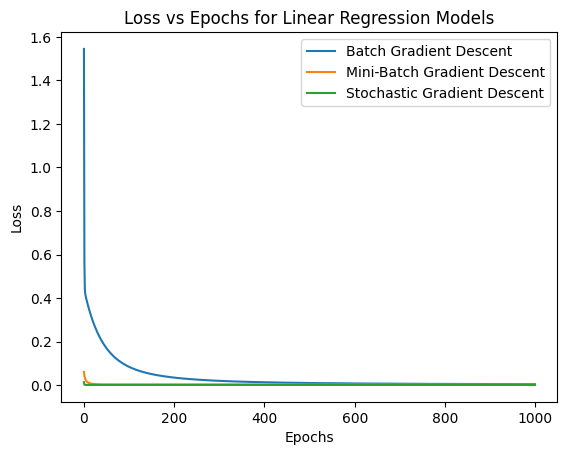

In [11]:
# Plot the loss-vs-iterations for each model
plt.plot(losses_batch, label="Batch Gradient Descent")
plt.plot(losses_mini, label="Mini-Batch Gradient Descent")
plt.plot(losses_sto, label="Stochastic Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Linear Regression Models")
plt.legend()
plt.show()

In [12]:
y_pred_batch = np.dot(X_test_norm, w_batch) + b_batch 
mse_batch = mse(y_test, y_pred_batch) 
print(f"MSE for Batch Gradient Descent: {mse_batch}")

y_pred_mini = np.dot(X_test_norm, w_mini) + b_mini 
mse_mini = mse(y_test, y_pred_mini) 
print(f"MSE for Mini-Batch Gradient Descent: {mse_mini}")

y_pred_sto = np.dot(X_test_norm, w_sto) + b_sto 
mse_sto = mse(y_test, y_pred_sto) 
print(f"MSE for Stochastic Gradient Descent: {mse_sto}")

MSE for Batch Gradient Descent: 0.004134846997689194
MSE for Mini-Batch Gradient Descent: 0.003554347259516263
MSE for Stochastic Gradient Descent: 0.005155965698166085


In [13]:
y_pred = y_pred_batch 
y_true = y_test 
correct = (y_pred > 0.5) == (y_true > 0.5) 
results = pd.DataFrame({"Prediction": y_pred.flatten(), "Actual": y_true.flatten(), "Correct": correct.flatten()}) 
print(results)

     Prediction  Actual  Correct
0      0.769057    0.73     True
1      0.590660    0.64     True
2      0.861531    0.84     True
3      0.863613    0.81     True
4      0.717991    0.76     True
..          ...     ...      ...
195    0.879403    0.87     True
196    0.620323    0.72     True
197    0.505529    0.57     True
198    0.622606    0.55     True
199    0.690434    0.62     True

[200 rows x 3 columns]


In [14]:
intercept = b_batch 
coefficients = w_batch.flatten() 
features = train_df.drop("Chance of Admit ", axis=1).columns 
equation = f"Chance of Admit = {intercept:.2f}" 
for coefficient, feature in zip(coefficients, features): 
    equation += f" + {coefficient:.2f} * {feature}" 
print(equation)

Chance of Admit = 0.39 + 0.32 * GRE Score + 0.01 * TOEFL Score + 0.02 * University Rating + 0.08 * SOP + 0.08 * LOR  + 0.08 * CGPA + 0.02 * Research


In [15]:
coefficient_feature_pairs = list(zip(coefficients, features)) 
coefficient_feature_pairs.sort(key=lambda x: abs(x[0]), reverse=True) 
ranking = pd.DataFrame(coefficient_feature_pairs, columns=["Coefficient", "Feature"]) 
ranking.index += 1
print(ranking)

   Coefficient            Feature
1     0.318888          GRE Score
2     0.084173               LOR 
3     0.083981               CGPA
4     0.075928                SOP
5     0.022334  University Rating
6     0.021160           Research
7     0.009082        TOEFL Score


In [16]:
# I choose to use polynomial basis functions of degree 2 for each feature
X_train_poly = np.hstack([X_train_norm**2, X_train_norm]) # add quadratic terms to the training features
X_test_poly = np.hstack([X_test_norm**2, X_test_norm]) # add quadratic terms to the test features

In [17]:
w_batch_poly, b_batch_poly, losses_batch_poly = train_linear_regression(X_train_poly, y_train, variant="batch")
w_mini_poly, b_mini_poly, losses_mini_poly = train_linear_regression(X_train_poly, y_train, variant="mini-batch")
w_sto_poly, b_sto_poly, losses_sto_poly = train_linear_regression(X_train_poly, y_train, variant="stochastic")

Epoch 1, Loss: 2.2145687409833816
Epoch 2, Loss: 1.9690909881511665
Epoch 3, Loss: 1.7633713048598243
Epoch 4, Loss: 1.5813498947809765
Epoch 5, Loss: 1.4201063737710038
Epoch 6, Loss: 1.277140691873212
Epoch 7, Loss: 1.1502625875544878
Epoch 8, Loss: 1.03755236566083
Epoch 9, Loss: 0.9373269388765398
Epoch 10, Loss: 0.8481101668737968
Epoch 11, Loss: 0.768606945735229
Epoch 12, Loss: 0.6976805714381225
Epoch 13, Loss: 0.6343329617925418
Epoch 14, Loss: 0.5776873741017947
Epoch 15, Loss: 0.5269733019551419
Epoch 16, Loss: 0.48151327482767536
Epoch 17, Loss: 0.440711319299744
Epoch 18, Loss: 0.4040428713715347
Epoch 19, Loss: 0.37104595610756225
Epoch 20, Loss: 0.3413134741982948
Epoch 21, Loss: 0.3144864554059843
Epoch 22, Loss: 0.29024815664769965
Epoch 23, Loss: 0.2683188979910112
Epoch 24, Loss: 0.24845154338509323
Epoch 25, Loss: 0.23042754477376548
Epoch 26, Loss: 0.21405347855672407
Epoch 27, Loss: 0.19915801237244585
Epoch 28, Loss: 0.18558924803815224
Epoch 29, Loss: 0.17321239

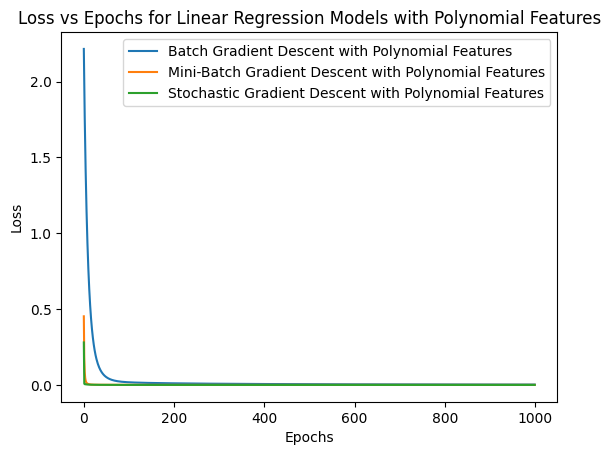

In [18]:
plt.plot(losses_batch_poly, label="Batch Gradient Descent with Polynomial Features")
plt.plot(losses_mini_poly, label="Mini-Batch Gradient Descent with Polynomial Features")
plt.plot(losses_sto_poly, label="Stochastic Gradient Descent with Polynomial Features")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Linear Regression Models with Polynomial Features")
plt.legend()
plt.show()

In [19]:
y_pred_batch_poly = np.dot(X_test_poly, w_batch_poly) + b_batch_poly 
mse_batch_poly = mse(y_test, y_pred_batch_poly) 
print(f"MSE for Batch Gradient Descent with Polynomial Features: {mse_batch_poly}")

y_pred_mini_poly = np.dot(X_test_poly, w_mini_poly) + b_mini_poly 
mse_mini_poly = mse(y_test, y_pred_mini_poly)
print(f"MSE for Mini-Batch Gradient Descent with Polynomial Features: {mse_mini_poly}")

y_pred_sto_poly = np.dot(X_test_poly, w_sto_poly) + b_sto_poly
mse_sto_poly = mse(y_test, y_pred_sto_poly)
print(f"MSE for Stochastic Gradient Descent with Polynomial Features: {mse_sto_poly}")

MSE for Batch Gradient Descent with Polynomial Features: 0.005648314400250218
MSE for Mini-Batch Gradient Descent with Polynomial Features: 0.0036310900582939187
MSE for Stochastic Gradient Descent with Polynomial Features: 0.012330936171355973
